<div style="text-align: center;">
    <a href="https://www.dataia.eu/">
        <img border="0" src="https://github.com/ramp-kits/template-kit/raw/main/img/DATAIA-h.png" width="90%"></a>
</div>

# RAMP starting kit on Credit Card Fraud Detection

## Introduction

Being able to detect fraudulent transactions is of utmost importance for any credit card company in order to protect their customers from theft but also to protect themselves from financial losses.

In this challenge, we will use a dataset of credit card transactions to predict whether a transaction is fraudulent or not. The dataset is anonymized and contains a mixture of numerical and categorical features. The goal is to design an algorithm that can accurately predict whether a transaction is fraudulent or not.

Authors: Abdoul R. Zeba, Richard Pholvichith, Thibaut Boyenval

_Data Source: The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines._
https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

# Exploratory data analysis

The goal of this section is to show what's in the data, and how to play with it.

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Load the data

import problem
X_df, y = problem.get_train_data()

In [2]:
X_df.head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,223734,-0.159214,-0.735659,1.084978,-1.917164,0.112598,0.023407,0.558458,-0.130866,0.001619,0.620931,-0.306452,0.269931,-1.052543,0.666708,-1.299348,1.675792,0.368708,-0.049422,-0.101830,0.344999,0.053097,0.668214,0.196711,0.123093,-0.123844,-0.707929,0.097900,0.403615,13836.11
1,235699,1.635986,-0.471681,-0.163091,-0.560048,0.735705,0.794481,0.398686,-0.095049,0.800491,0.418648,0.028275,0.893456,-0.706834,0.492047,1.306056,0.341183,0.775387,0.314045,-1.110526,-0.457377,0.007956,0.927573,-0.056867,-2.659093,0.018652,0.041242,-0.195896,-0.233664,13057.02
2,445551,0.341072,0.337153,-0.773249,0.807825,-0.424489,-0.974921,-0.595818,0.138865,0.111428,-0.789760,1.516736,-1.219764,0.825253,-1.011786,0.628815,-0.920417,-0.669720,-0.263850,1.458567,0.397363,0.183904,0.006030,0.676308,0.196955,-2.891691,0.711103,0.552807,0.351799,14111.56
3,541689,-0.528866,-2.299178,-0.540659,0.312991,-0.774569,1.172104,2.449662,-0.405469,0.904422,0.037811,-0.149145,-0.359215,-0.340504,0.375332,0.371745,-0.071265,-0.027181,0.170604,0.332830,1.133167,0.046247,-0.535302,-1.804198,1.008372,-0.749256,-1.093696,0.387419,-0.446210,12428.37
4,381384,-1.857631,1.691886,-2.087428,2.351860,-1.627382,-1.015960,-2.072845,-0.008049,-1.927341,-1.915805,2.152737,-1.720059,0.818594,-1.679926,-0.401037,-1.505059,-1.385364,-1.438600,0.345806,0.813659,-1.133705,0.997370,1.156087,-1.694666,-0.348273,1.356291,3.056967,-3.541932,18916.88


In [5]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227452 entries, 0 to 227451
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      227452 non-null  int64  
 1   V1      227452 non-null  float64
 2   V2      227452 non-null  float64
 3   V3      227452 non-null  float64
 4   V4      227452 non-null  float64
 5   V5      227452 non-null  float64
 6   V6      227452 non-null  float64
 7   V7      227452 non-null  float64
 8   V8      227452 non-null  float64
 9   V9      227452 non-null  float64
 10  V10     227452 non-null  float64
 11  V11     227452 non-null  float64
 12  V12     227452 non-null  float64
 13  V13     227452 non-null  float64
 14  V14     227452 non-null  float64
 15  V15     227452 non-null  float64
 16  V16     227452 non-null  float64
 17  V17     227452 non-null  float64
 18  V18     227452 non-null  float64
 19  V19     227452 non-null  float64
 20  V20     227452 non-null  float64
 21  V21     22

In [4]:
X_df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000,227452.000000
mean,284565.493344,0.000340,0.000316,-0.000968,0.001089,-0.000971,-0.000786,0.000395,0.000091,0.002293,0.000037,-0.000949,-0.000106,-0.000352,0.000072,-0.001433,-0.001588,-0.000555,-0.000665,-0.000238,0.000623,-0.002342,0.001992,0.001450,0.000207,-0.002854,-0.001068,0.000471,0.001870,12034.830095
std,164175.135486,1.000922,0.996783,0.999878,0.999096,0.998465,1.000563,1.057012,0.998574,1.001508,1.000539,1.002368,1.001551,0.999199,1.000808,1.001818,1.001027,0.998276,0.999231,0.999304,1.011776,0.998124,0.998257,0.995132,0.999872,1.000718,1.001095,1.019872,0.978997,6916.162570
min,0.000000,-3.218534,-40.194965,-3.183760,-4.833530,-9.952786,-17.208338,-4.350205,-10.756342,-3.751815,-3.162937,-5.954723,-2.020399,-5.955227,-2.107293,-3.861813,-2.214513,-2.484938,-2.421015,-7.486280,-78.147839,-19.382523,-6.838888,-25.431127,-4.067968,-9.719067,-8.226969,-5.956088,-39.035243,50.130000
25%,142585.750000,-0.566170,-0.487615,-0.649318,-0.656362,-0.294800,-0.446170,-0.284187,-0.192167,-0.567936,-0.590597,-0.703741,-0.832112,-0.697189,-0.872971,-0.624497,-0.714996,-0.618712,-0.555957,-0.564721,-0.350103,-0.167051,-0.490715,-0.237256,-0.651060,-0.557032,-0.634264,-0.304737,-0.231041,6055.120000
50%,284332.500000,-0.092825,-0.135287,-0.000005,-0.073409,0.080480,0.078744,0.234042,-0.114822,0.093669,0.264005,-0.041799,0.163981,0.016128,0.231814,-0.041845,0.132825,0.271570,0.087302,-0.026898,-0.123575,-0.038231,-0.026786,-0.059243,0.018093,-0.010000,-0.011178,-0.172712,-0.013615,12036.510000
75%,427212.500000,0.834722,0.344675,0.628233,0.706737,0.440598,0.496731,0.526867,0.045790,0.564197,0.593152,0.748627,0.743499,0.686055,0.750068,0.667116,0.653848,0.518651,0.544077,0.558989,0.250479,0.148176,0.464273,0.156828,0.700449,0.546677,0.671725,0.335159,0.411855,18018.237500
max,568629.000000,2.219470,4.359827,4.440555,3.201536,39.572184,26.168402,217.873038,5.958040,12.139515,17.313783,2.513435,17.913556,7.187486,19.169544,14.532202,46.652906,6.313605,6.210964,3.818633,28.973252,8.087080,12.632511,31.004622,12.965639,11.558177,5.623285,113.231093,36.678192,24039.930000


Balanced classes

In [6]:
unique, counts = np.unique(y, return_counts=True)

for label, count in zip(unique, counts):
    print(f"Classe {label}: {count} samples")


Classe 0: 113726 samples
Classe 1: 113726 samples


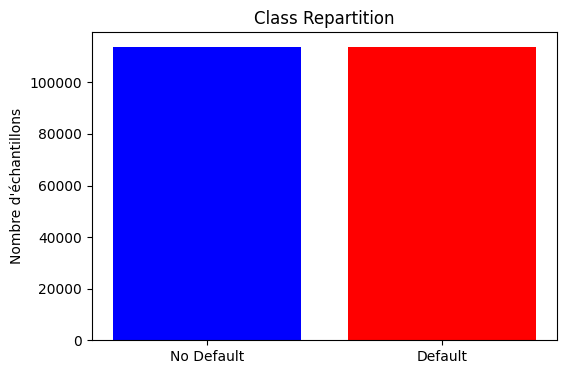

In [19]:
plt.figure(figsize=(6, 4))
plt.bar(unique, counts, color=['blue', 'red'])
plt.xticks(unique, labels=["No Default", "Default"])
plt.ylabel("Nombre d'échantillons")
plt.title("Class Repartition")
plt.show()

## The static features

<span style="color:red">Red variables</span> are ids, labels, or other human-annotated features, so they should not be used as input in the classification. <span style="color:lightblue">Light blue variables</span> are legal but not likely to contribute information to the classification. <span style="color:black">Black</span> variables are definitely discriminative.

<ul>
    <li> <code><b><span style="color:red">id</span></b></code>: Unique identifier for each transaction.
    <li> <code><b><span style="color:black">V1-V28</span></b></code>: Anonymized features representing various transaction attributes (e.g., time, location, etc.).
    <li> <code><b><span style="color:black">Amount</span></b></code>: The transaction amount.
    <li> <code><b>Class</b></code>: Binary label indicating whether the transaction is fraudulent (1) or not (0).
</ul> 

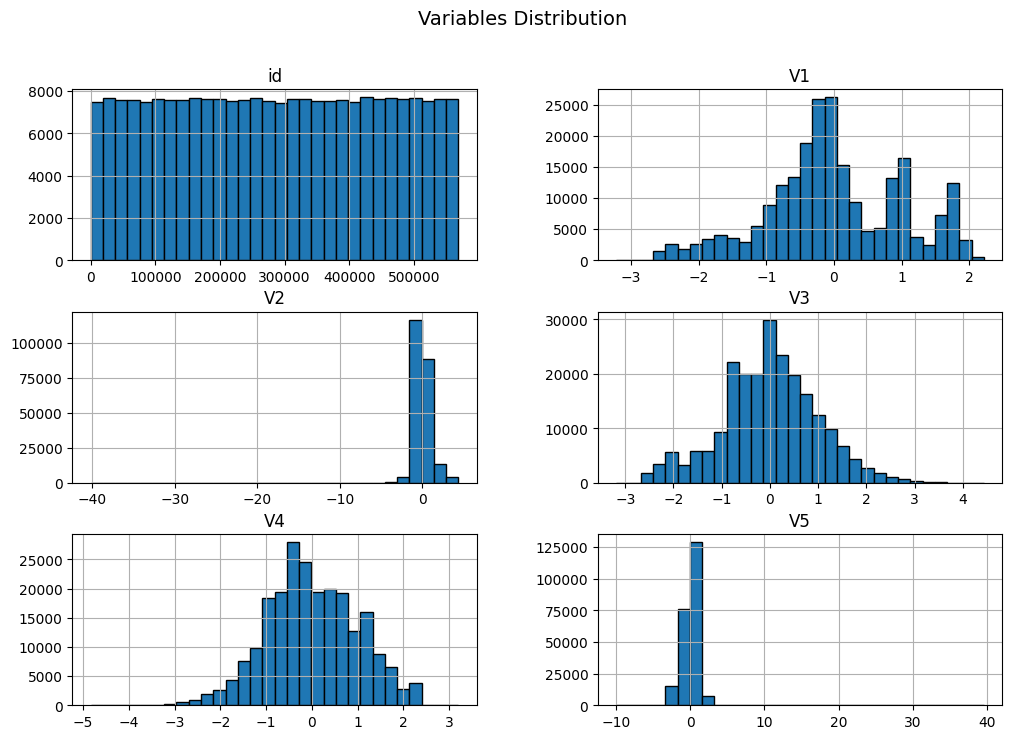

In [18]:
cols_to_plot = X_df.columns[:6]

X_df[cols_to_plot].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Variables Distribution", fontsize=14)
plt.show()


<Figure size 1200x600 with 0 Axes>

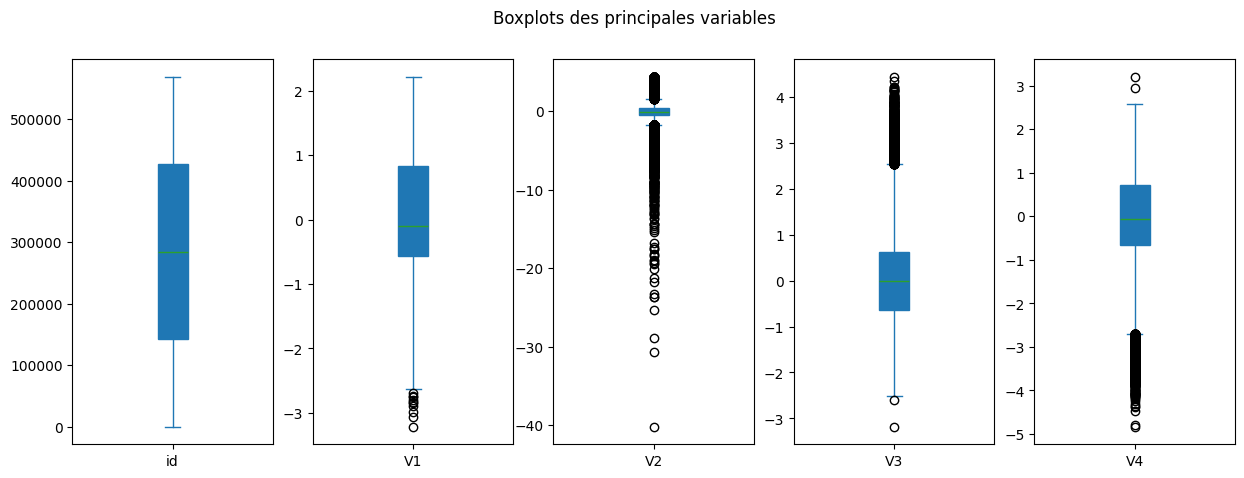

In [ ]:
features = X_df.columns[:5]

plt.figure(figsize=(12, 6))
X_df[features].plot(kind='box', subplots=True, layout=(1, len(features)), figsize=(15, 5), patch_artist=True)
plt.suptitle("Variables Boxplots")
plt.show()


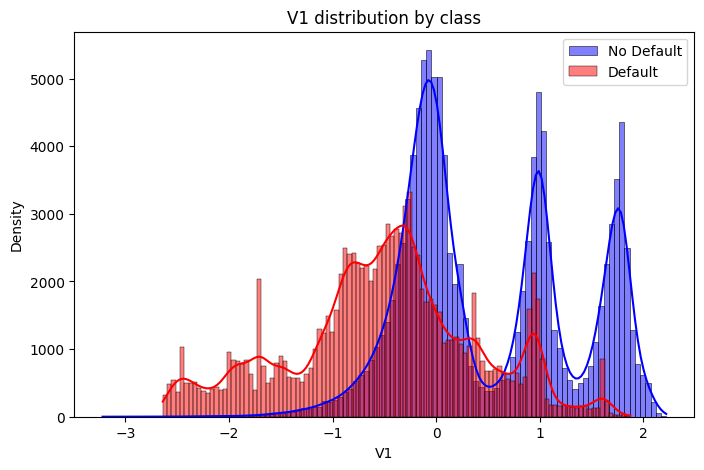

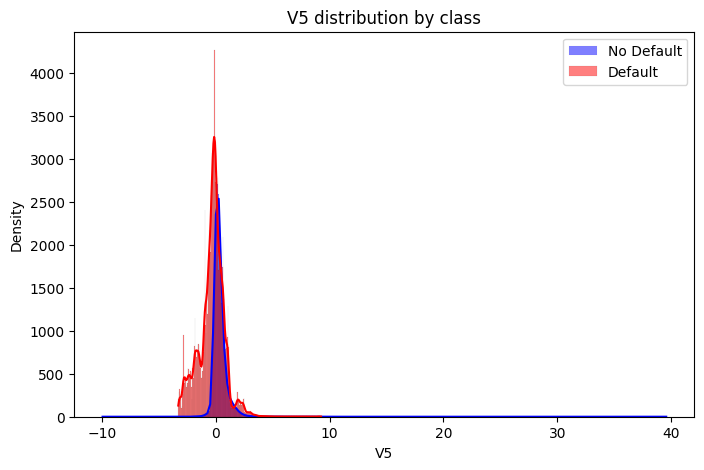

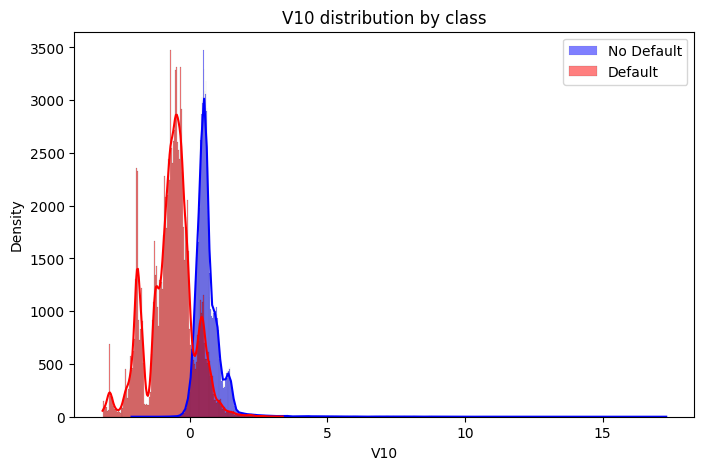

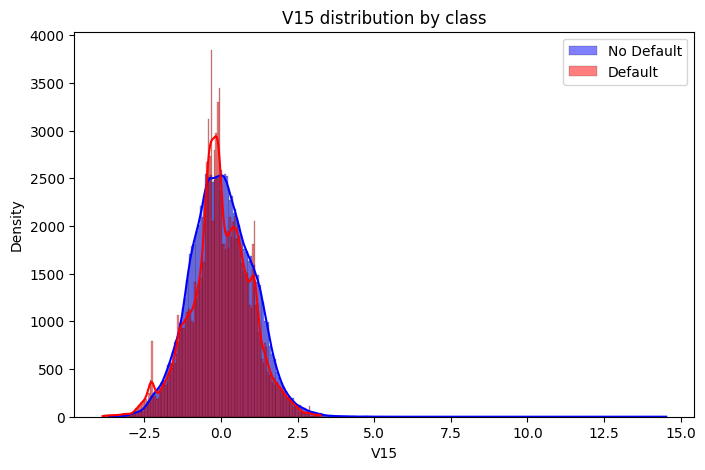

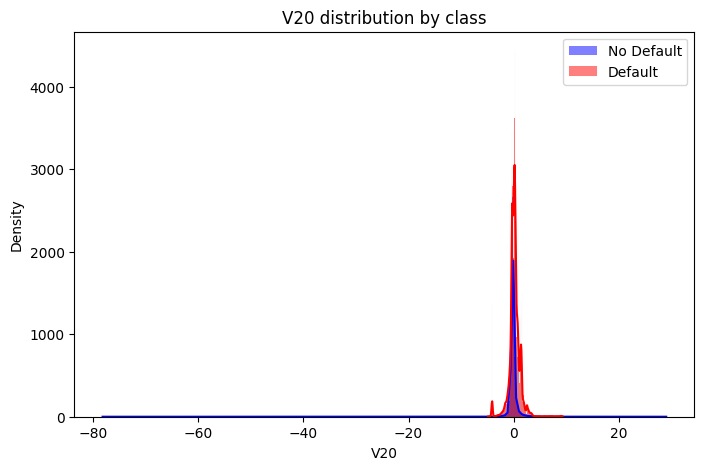

In [17]:
lf = [1, 5, 10, 15, 20]

for i in lf:
    feature_name = X_df.columns[i]

    plt.figure(figsize=(8, 5))
    sns.histplot(X_df[feature_name][y == 0], color="blue", label="No Default", kde=True)
    sns.histplot(X_df[feature_name][y == 1], color="red", label="Default", kde=True)
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.title(f"{feature_name} distribution by class")
    plt.legend()
    plt.show()

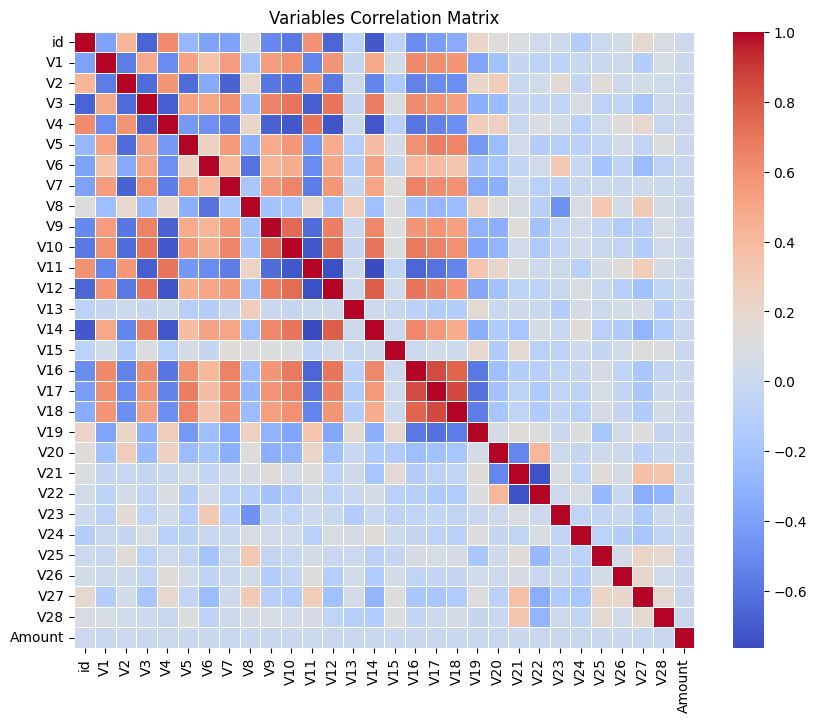

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Variables Correlation Matrix")
plt.show()

# Challenge evaluation

The roc_auc score is the default metric for the challenge


# Submission format

Here, you should describe the submission format. This is the format the participants should follow to submit their predictions on the RAMP plateform.

This section also show how to use the `ramp-workflow` library to test the submission locally.

## The pipeline workflow

The input data are stored in a dataframe. To go from a dataframe to a numpy array we will use a scikit-learn column transformer. The first example we will write will just consist in selecting a subset of columns we want to work with.

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def get_estimator():
    pipe = make_pipeline(
        StandardScaler(),
        LogisticRegression()
    )

    return pipe


## Testing using a scikit-learn pipeline

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(get_estimator(), X_df, y, cv=5, scoring='accuracy')
print(scores)

[0.99835132 0.99848322 0.99828534 0.99870301 0.99874698]


## Submission

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).